### Importing Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image# image processing task
import tensorflow as tf
tf.random.set_seed(3)#when we train our neural network ,several values randomly gets generated so each time we train our neural network we get different results even if we use the same data, the accuracy values might slightly change so we set the random seed to a particular number to get identical value
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### Loading the MNIST data from keras.dataset

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
#x_train has got 60000 images with a dimension of length 28 and width 28
#Traing data--->60000--training images;10000--->test images; labels are stored in y
# as it is a grayscale images it has only one channel



### Printing the 10th image

In [7]:
print(x_train[10])# it will be in numerical format,numpy array from 0 to 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(x_train[10].shape)

(28, 28)


### Displaying the image

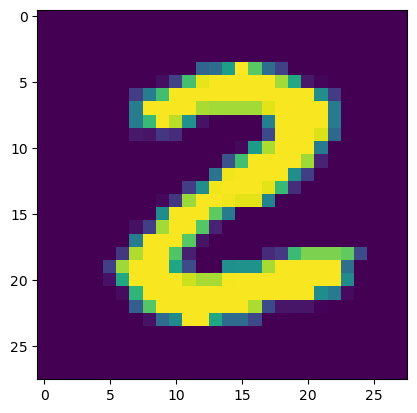

2


In [9]:
plt.imshow(x_train[25])
plt.show()
#printing the corresponding label
print(y_train[25])

### Image Labels

In [10]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [11]:
# Unique values in  y_train
print(np.unique(y_train))

# Unique values in  y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
##We can use the labels s such or use One Hot Encoding were if the label is 0 then it is 1 and all the others are 0
# All the images have the same dimensions in this dataset, if noe, resize all the images to a common dimension

### Scaling the Value---Normalization( to convert the numbers from 0 to 1 without changing the info)

In [13]:
#0/255=0
#255/255=1
# the minimumvalue is 0 and maximum is 255 so by dividing by 255 we get either 0 or 1 (ie) between 0 and 1

x_train=x_train/255
x_test=x_test/255


In [14]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Building the Neural Network

In [15]:
 # Setting up the layers of the Neural Network
#All the images are in the form of 28X28 matrix dimensions. As we cannot fed that we convert all the rows and columns into a single line. 1D matrix
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(50,activation='relu'),#50 neurons
                       keras.layers.Dense(50,activation='relu'),
                       keras.layers.Dense(10,activation='sigmoid')])# 10 neurons or class


### Compiling the neural network

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


### Training the Neural Network

In [17]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2950 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9665
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9828
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0470 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

## Training data accuracy is 98.9 %

### Accuracy on Test data


In [18]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9723


## Test Data Accuracy=97.1%

In [19]:
print(x_test.shape)

(10000, 28, 28)


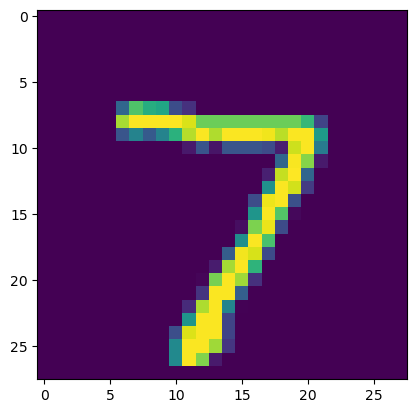

In [20]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [21]:
print(y_test[0])

7


In [22]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [23]:
print(y_pred.shape)

(10000, 10)


In [24]:
print(y_pred[0])

[1.7727914e-03 2.7618047e-02 4.9551046e-01 8.6731333e-01 2.4516617e-03
 9.6302822e-02 4.4125779e-11 9.9999946e-01 6.7180686e-04 4.2946801e-02]


### This infers that there are 4.1 probablity of being  0, 9.192 probablity of being 1..etc. This can be converted into labels using np.argmax. Model.predict() gives the prediction probablity of each class for that data point.

### Converting the prediction probablities to class labels

In [25]:
label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


### Converting the prediction probablities to class label for all test data points.( 10000 values)

In [26]:
y_pred_label=[np.argmax(i) for i in y_pred]
print (y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test----> True labels ; 
y_pred_labels---->Predicted Labels
### Confusion Matrix

In [27]:
conf_mat=confusion_matrix(y_test,y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 954    0    4    1    1    9    3    3    4    1]
 [   0 1124    2    0    0    1    2    0    6    0]
 [   2    1 1009    3    2    0    2    6    7    0]
 [   0    1   14  964    3   18    0    4    3    3]
 [   0    0    7    0  961    1    5    0    0    8]
 [   2    1    0    5    2  873    1    1    4    3]
 [   2    3    0    4    3   10  929    0    7    0]
 [   0    3   10    0    1    0    0 1004    5    5]
 [   1    0    5    4    4    6    2    4  945    3]
 [   0    3    2    9   12    7    0   11    5  960]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

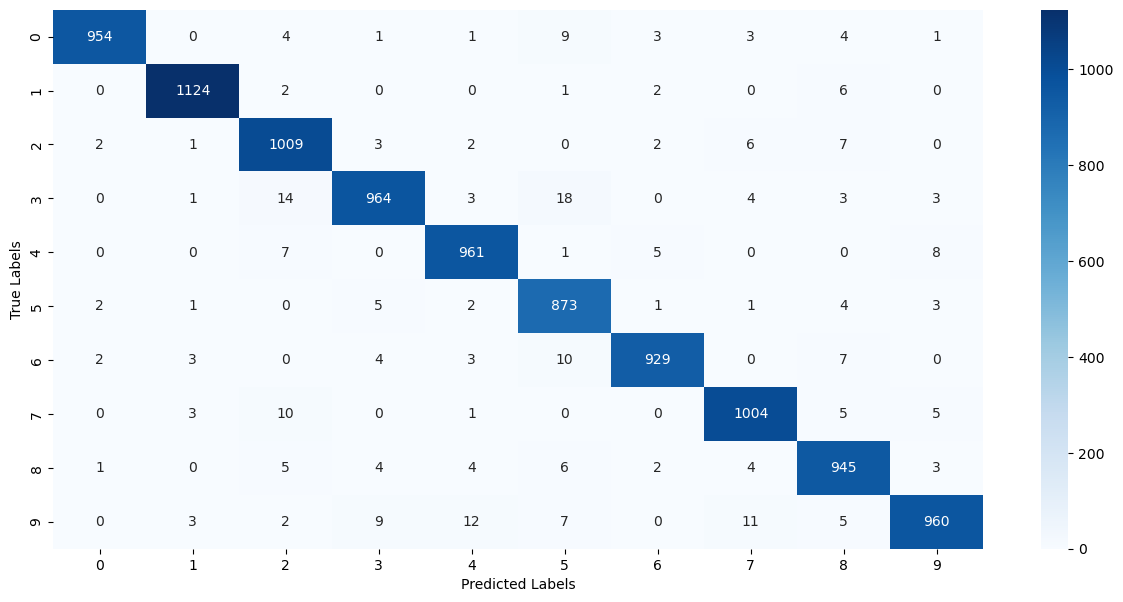

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')